In [ ]:
!pip uninstall matplotlib
!pip install matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import cv2 
import glob
import random
from os import listdir
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D,MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD

##Reading data

In [ ]:
import zipfile
from google.colab import drive

drive.mount('/content/drive/')

zip_ref = zipfile.ZipFile("/content/drive/My Drive/archive.zip", 'r')
zip_ref.extractall("/tmp")
zip_ref.close()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
breast_img = glob.glob('/tmp/IDC_regular_ps50_idx5/**/*.png', recursive = True)

for imgname in breast_img[:3]:
    print(imgname)

N_IDC = []
P_IDC = []

for img in breast_img:
    if img[-5] == '0' :
        N_IDC.append(img)
    
    elif img[-5] == '1' :
        P_IDC.append(img)

/tmp/IDC_regular_ps50_idx5/12823/1/12823_idx5_x2551_y1251_class1.png
/tmp/IDC_regular_ps50_idx5/12823/1/12823_idx5_x3051_y1501_class1.png
/tmp/IDC_regular_ps50_idx5/12823/1/12823_idx5_x2851_y1701_class1.png


In [ ]:
N_IDC

['/tmp/IDC_regular_ps50_idx5/12823/0/12823_idx5_x1501_y1301_class0.png',
 '/tmp/IDC_regular_ps50_idx5/12823/0/12823_idx5_x1751_y2351_class0.png',
 '/tmp/IDC_regular_ps50_idx5/12823/0/12823_idx5_x3451_y1701_class0.png',
 '/tmp/IDC_regular_ps50_idx5/12823/0/12823_idx5_x1951_y551_class0.png',
 '/tmp/IDC_regular_ps50_idx5/12823/0/12823_idx5_x2251_y2101_class0.png',
 '/tmp/IDC_regular_ps50_idx5/12823/0/12823_idx5_x951_y2051_class0.png',
 '/tmp/IDC_regular_ps50_idx5/12823/0/12823_idx5_x1601_y2051_class0.png',
 '/tmp/IDC_regular_ps50_idx5/12823/0/12823_idx5_x2301_y1201_class0.png',
 '/tmp/IDC_regular_ps50_idx5/12823/0/12823_idx5_x2651_y351_class0.png',
 '/tmp/IDC_regular_ps50_idx5/12823/0/12823_idx5_x1651_y1901_class0.png',
 '/tmp/IDC_regular_ps50_idx5/12823/0/12823_idx5_x1551_y2001_class0.png',
 '/tmp/IDC_regular_ps50_idx5/12823/0/12823_idx5_x1801_y2251_class0.png',
 '/tmp/IDC_regular_ps50_idx5/12823/0/12823_idx5_x3551_y1551_class0.png',
 '/tmp/IDC_regular_ps50_idx5/12823/0/12823_idx5_x3501_

##Visualizations

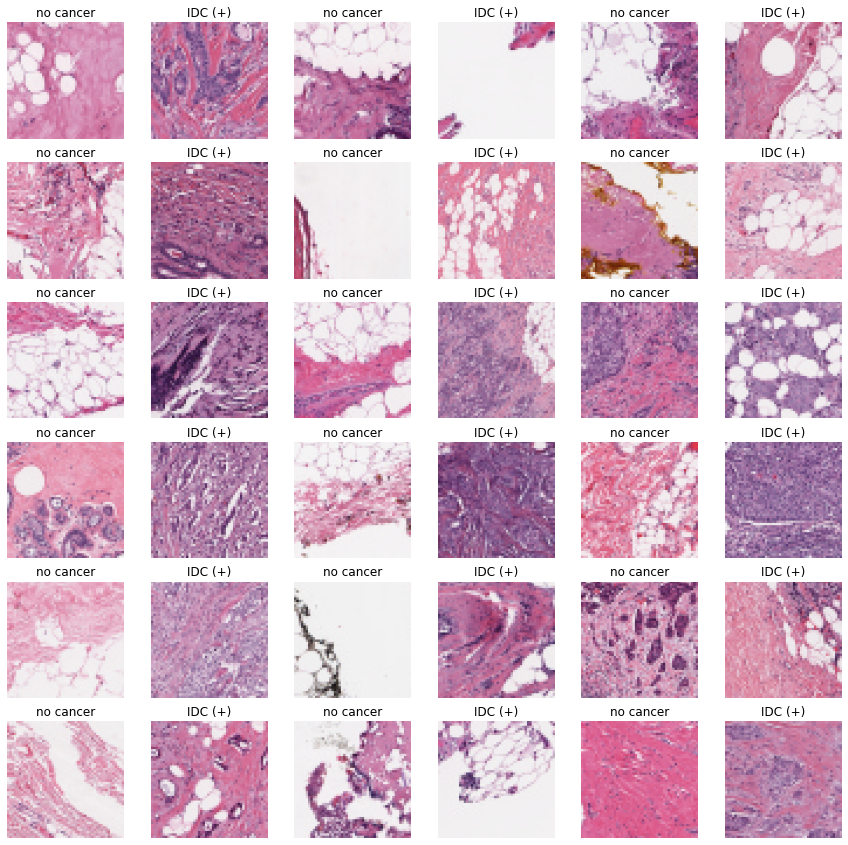

In [ ]:
from keras.preprocessing import image
import keras.utils as image

plt.figure(figsize = (15, 15))

some_non = np.random.randint(0, len(N_IDC), 18)
some_can = np.random.randint(0, len(P_IDC), 18)

s = 0
for num in some_non:
    
        img = image.load_img((N_IDC[num]), target_size=(100, 100))
        img = image.img_to_array(img)
        
        plt.subplot(6, 6, 2*s+1)
        plt.axis('off')
        plt.title('no cancer')
        plt.imshow(img.astype('uint8'))
        s += 1
s = 1
for num in some_can:
    
        img = image.load_img((P_IDC[num]), target_size=(100, 100))
        img = image.img_to_array(img)
        
        plt.subplot(6, 6, 2*s)
        plt.axis('off')        
        plt.title('IDC (+)')
        plt.imshow(img.astype('uint8'))
        s += 1

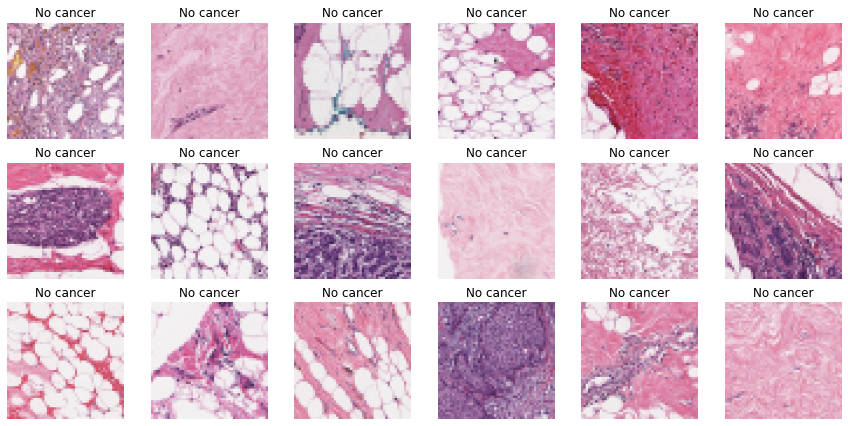

In [ ]:
plt.figure(figsize = (15, 15))

nc = np.random.randint(0, len(N_IDC), 18)
c = np.random.randint(0, len(P_IDC), 18)

s = 1
for num in nc:
    
        img = image.load_img((N_IDC[num]), target_size=(100, 100))
        img = image.img_to_array(img)
        
        plt.subplot(6, 6, s)
        plt.axis('off')
        plt.title('No cancer')
        plt.imshow(img.astype('uint8'))
        s += 1


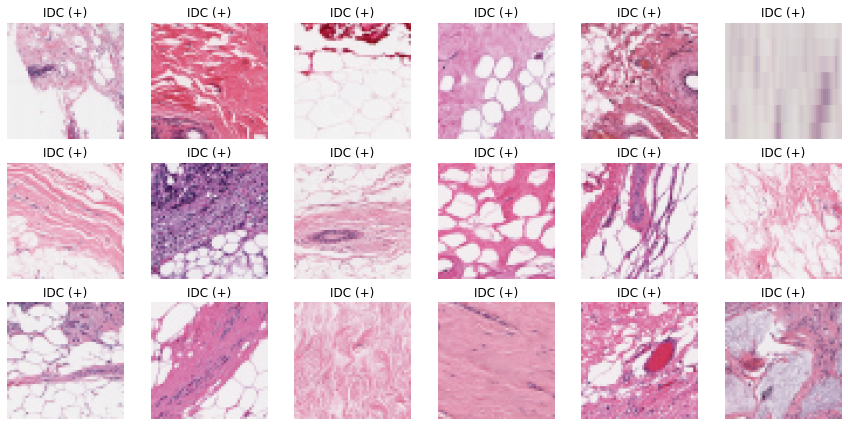

In [ ]:
plt.figure(figsize = (15, 15))

c = np.random.randint(0, len(P_IDC), 18)

s = 1
for num in c:
    
        img = image.load_img((N_IDC[num]), target_size=(100, 100))
        img = image.img_to_array(img)
        
        plt.subplot(6, 6, s)
        plt.axis('off')
        plt.title('IDC (+)')
        plt.imshow(img.astype('uint8'))
        s += 1


In [ ]:
non_img_arr = []
can_img_arr = []

for img in N_IDC:
        
    n_img = cv2.imread(img, cv2.IMREAD_COLOR)
    n_img_size = cv2.resize(n_img, (50, 50), interpolation = cv2.INTER_LINEAR)
    non_img_arr.append([n_img_size, 0])
    
for img in P_IDC:
    c_img = cv2.imread(img, cv2.IMREAD_COLOR)
    c_img_size = cv2.resize(c_img, (50, 50), interpolation = cv2.INTER_LINEAR)
    can_img_arr.append([c_img_size, 1])

In [ ]:
X = []
y = []

breast_img_arr = np.concatenate((non_img_arr, can_img_arr))
random.shuffle(breast_img_arr)

for feature, label in breast_img_arr:
    X.append(feature)
    y.append(label)
    
X = np.array(X)
y = np.array(y)


In [ ]:
def describeData(a,b):
    print('Total number of images: {}'.format(len(a)))
    print('Number of IDC(-) Images: {}'.format(np.sum(b==0)))
    print('Number of IDC(+) Images: {}'.format(np.sum(b==1)))
    print('Image shape (Width, Height, Channels): {}'.format(a[0].shape))
describeData(X,y)

Total number of images: 277524
Number of IDC(-) Images: 265080
Number of IDC(+) Images: 12444
Image shape (Width, Height, Channels): (50, 50, 3)


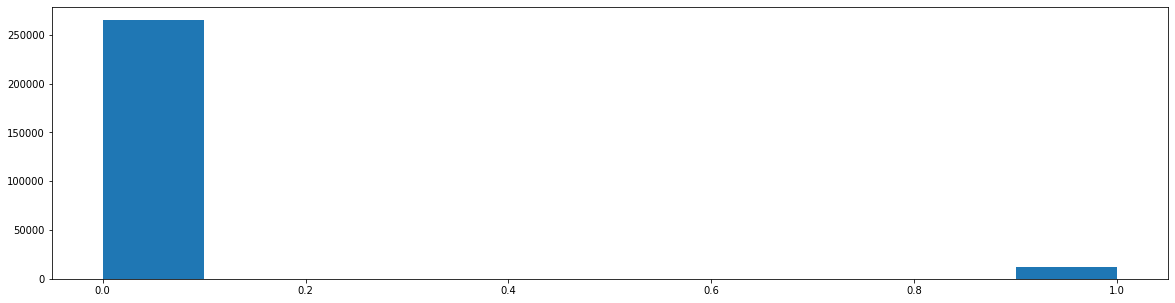

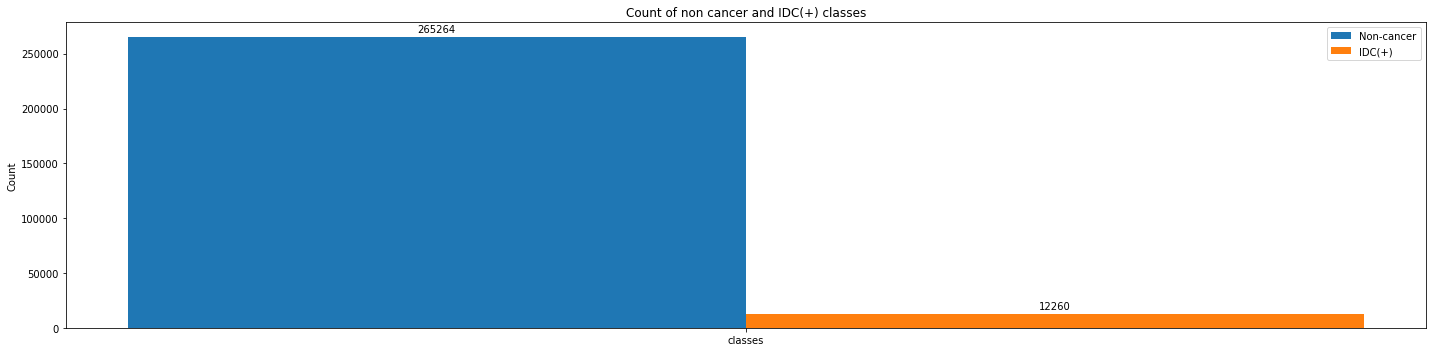

In [ ]:
x = [265117, 12407]

# plt.hist(y, density=False, bins=(0,1,2))  # density=False would make counts
# plt.ylabel('counts')
# plt.xlabel('class')
fig, ax = plt.subplots(figsize=(20,5))

counts, edges, bars = plt.hist(y)
nc = np.sum(y==0)
c = np.sum(y==1)
classes = ['classes']
x = np.arange(len(classes))
width = 0.35
fig, ax = plt.subplots(figsize=(20,5))
rects1 = ax.bar(x - width/2, nc, width, label='Non-cancer')
rects2 = ax.bar(x + width/2, c, width, label='IDC(+)')

ax.set_ylabel('Count')
ax.set_title('Count of non cancer and IDC(+) classes')
plt.xticks(x, classes)
ax.legend()

plt.bar_label(rects1, padding=3)
plt.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

## data prep

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3)
X_train, X_val, Y_train, Y_val = train_test_split(X, y, test_size = 0.3)

from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(Y_train, num_classes = 2)
Y_test = to_categorical(Y_test, num_classes = 2)
Y_val = to_categorical(Y_val, num_classes = 2)

print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)
print("Validation Data Shape:", X_val.shape)

Training Data Shape: (194266, 50, 50, 3)
Testing Data Shape: (83258, 50, 50, 3)
Validation Data Shape: (83258, 50, 50, 3)


In [ ]:
X_train = X_train[0:50000] 
Y_train = Y_train[0:50000] 
X_test = X_test[0:30000] 
Y_test = Y_test[0:30000] 

X_test = X_val[0:30000] 
Y_test = Y_val[0:30000] 

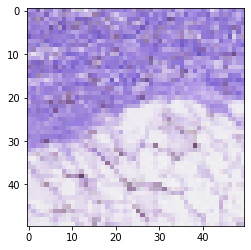

In [ ]:
plt.imshow(X_train[0])

In [ ]:
from tensorflow.keras.optimizers import Adam, SGD
from keras.metrics import binary_crossentropy
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
import itertools

##CNN

In [ ]:
# CNN - 1 : 3 conv2d layers
early_stop=EarlyStopping(monitor='val_loss',patience=5)
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(50, 50, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.3))
model.add(Dense(24, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(2, activation='softmax'))

In [ ]:
from tensorflow.keras import metrics
model.compile(Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy',metrics.Precision(),metrics.Recall(), metrics.AUC()])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 50, 50, 32)        896       
                                                                 
 batch_normalization_6 (Batc  (None, 50, 50, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_6 (Conv2D)           (None, 50, 50, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_7 (Batc  (None, 25, 25, 32)       128       
 hNormalization)                                                 
                                                      

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 50, 50, 32)        896       
                                                                 
 batch_normalization_6 (Batc  (None, 50, 50, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_6 (Conv2D)           (None, 50, 50, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_7 (Batc  (None, 25, 25, 32)       128       
 hNormalization)                                                 
                                                      

In [ ]:
history = model.fit(X_train, Y_train, validation_data = (X_val, Y_val), epochs = 10, batch_size = 100)

Epoch 1/10
500/500 [==============================] - 935s 2s/step - loss: 0.1918 - accuracy: 0.9459 - precision: 0.9459 - recall: 0.9459 - auc: 0.9773 - val_loss: 0.1336 - val_accuracy: 0.9551 - val_precision: 0.9551 - val_recall: 0.9551 - val_auc: 0.9832
Epoch 2/10
500/500 [==============================] - 926s 2s/step - loss: 0.1345 - accuracy: 0.9551 - precision: 0.9551 - recall: 0.9551 - auc: 0.9839 - val_loss: 0.1353 - val_accuracy: 0.9557 - val_precision: 0.9557 - val_recall: 0.9557 - val_auc: 0.9848
Epoch 3/10
500/500 [==============================] - 921s 2s/step - loss: 0.1215 - accuracy: 0.9564 - precision: 0.9564 - recall: 0.9564 - auc: 0.9865 - val_loss: 0.1545 - val_accuracy: 0.9369 - val_precision: 0.9369 - val_recall: 0.9369 - val_auc: 0.9850
Epoch 4/10
500/500 [==============================] - 922s 2s/step - loss: 0.1065 - accuracy: 0.9600 - precision: 0.9600 - recall: 0.9600 - auc: 0.9893 - val_loss: 0.1521 - val_accuracy: 0.9343 - val_precision: 0.9343 - val_recal

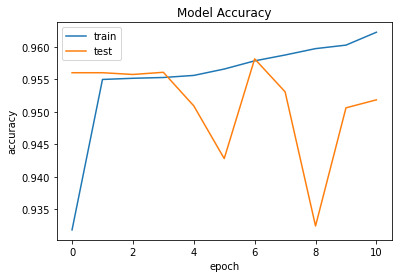

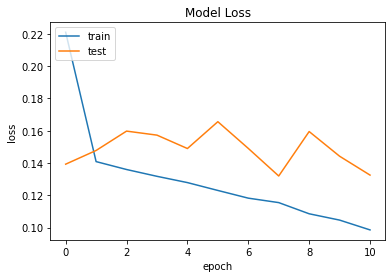

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

938/938 [==============================] - 133s 141ms/step


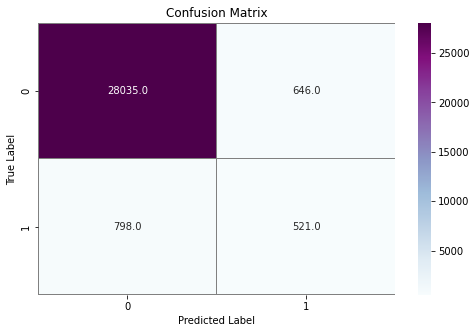

In [ ]:
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(Y_test,axis = 1) 

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
f,ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="BuPu",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

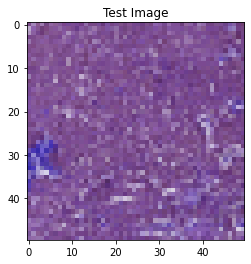

In [ ]:
def img_plot(arr,index=0):
    plt.title('Test Image')
    plt.imshow(arr[index])
    
index = 90
img_plot(X_test, index)

In [ ]:
input = X_test[index:index+1]
pred = model.predict(input)[0].argmax()
label = Y_test[index].argmax()
print('Predicted Value using  cnn model',pred)
print("True Value",label)

1/1 [==============================] - 0s 28ms/step
Predicted Value using  cnn model 0
True Value 1


##CNN 2 (Model 2)

In [ ]:
early_stop=EarlyStopping(monitor='val_loss',patience=5)
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation='sigmoid', kernel_initializer='variance_scaling', padding='same', input_shape=(50, 50, 3)))
model2.add(BatchNormalization())
model2.add(Conv2D(32, (3, 3), activation='sigmoid', kernel_initializer='variance_scaling', padding='same'))
model2.add(MaxPooling2D((2, 2)))
model2.add(BatchNormalization())
model2.add(Dropout(0.3))
model2.add(Conv2D(64, (3, 3), activation='sigmoid', kernel_initializer='variance_scaling', padding='same'))
model2.add(BatchNormalization())
model2.add(Conv2D(64, (3, 3), activation='sigmoid', kernel_initializer='variance_scaling', padding='same'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(0.3))
model2.add(Conv2D(128, (3, 3), activation='sigmoid', kernel_initializer='variance_scaling', padding='same'))
model2.add(BatchNormalization())
model2.add(Conv2D(128, (3, 3), activation='sigmoid', kernel_initializer='variance_scaling', padding='same'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(0.3))
model2.add(Conv2D(256, (3, 3), activation='sigmoid', kernel_initializer='variance_scaling', padding='same'))
model2.add(Flatten())
model2.add(Dense(256, activation='sigmoid', kernel_initializer='variance_scaling'))
model2.add(BatchNormalization())
model2.add(Dense(64, activation='sigmoid', kernel_initializer='variance_scaling'))
model2.add(BatchNormalization())
model2.add(Dense(64, activation='sigmoid', kernel_initializer='variance_scaling'))
model2.add(Dropout(0.3))
model2.add(Dense(24, activation='sigmoid', kernel_initializer='variance_scaling'))
model2.add(Dense(2, activation='softmax'))

In [ ]:
from tensorflow.keras import metrics
model2.compile(Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy',metrics.Precision(),metrics.Recall(), metrics.AUC()])
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 50, 50, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 32)       0         
 )                                                               
                                                                 
 batch_normalization_1 (Batc  (None, 25, 25, 32)       128       
 hNormalization)                                                 
                                                        

In [ ]:
history = model2.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = 10, batch_size = 35)

Epoch 1/10
1429/1429 [==============================] - 1383s 965ms/step - loss: 0.2722 - accuracy: 0.9545 - precision: 0.9545 - recall: 0.9545 - auc: 0.9725 - val_loss: 0.1708 - val_accuracy: 0.9537 - val_precision: 0.9537 - val_recall: 0.9537 - val_auc: 0.9773
Epoch 2/10
1429/1429 [==============================] - 1379s 965ms/step - loss: 0.1548 - accuracy: 0.9562 - precision: 0.9562 - recall: 0.9562 - auc: 0.9798 - val_loss: 0.1510 - val_accuracy: 0.9537 - val_precision: 0.9537 - val_recall: 0.9537 - val_auc: 0.9826
Epoch 3/10
1429/1429 [==============================] - 1391s 973ms/step - loss: 0.1431 - accuracy: 0.9562 - precision: 0.9562 - recall: 0.9562 - auc: 0.9809 - val_loss: 0.1425 - val_accuracy: 0.9537 - val_precision: 0.9537 - val_recall: 0.9537 - val_auc: 0.9798
Epoch 4/10
1429/1429 [==============================] - 1392s 974ms/step - loss: 0.1378 - accuracy: 0.9562 - precision: 0.9562 - recall: 0.9562 - auc: 0.9814 - val_loss: 0.1970 - val_accuracy: 0.9537 - val_preci

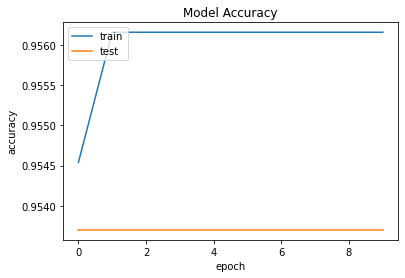

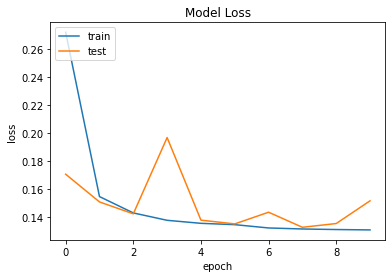

In [ ]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

938/938 [==============================] - 178s 189ms/step


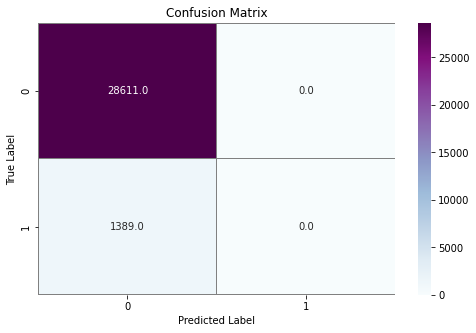

In [ ]:
Y_pred = model2.predict(X_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(Y_test,axis = 1) 

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
f,ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="BuPu",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

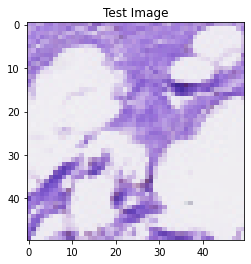

In [ ]:
def img_plot(arr,index=0):
    plt.title('Test Image')
    plt.imshow(arr[index])
    
index = 90
img_plot(X_test, index)

In [ ]:
input = X_test[index:index+1]
pred = model2.predict(input)[0].argmax()
label = Y_test[index].argmax()
print('Predicted Value using  cnn model',pred)
print("True Value",label)

1/1 [==============================] - 0s 56ms/step
Predicted Value using  cnn model 0
True Value 0


##VGG16

In [ ]:
import tensorflow as tf
base_model = tf.keras.applications.VGG16(
                include_top=False,
                weights="imagenet",
                input_tensor=None,
                pooling=None,
                input_shape= (50,50,3)
            )
for layer in base_model.layers:
    layer.trainable = False

58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
def vgg():

    model = Sequential()
    model.add(base_model)
    
    model.add(Flatten())
    model.add(BatchNormalization())
    model.add(Dense(256,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2,activation='softmax'))
    
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])
    
    return model

In [ ]:
model_1 = vgg()
model_1.summary()
#model_1.fit(X_train,Y_train, epochs=10)
history = model_1.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = 5, batch_size = 100)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                        

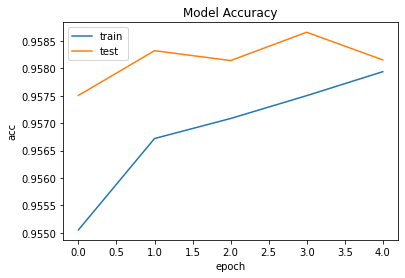

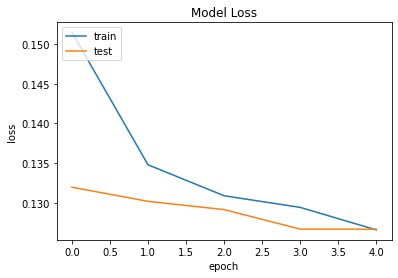

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from tensorflow.keras.optimizers import Adam, SGD
from keras.metrics import binary_crossentropy
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
import itertools

2602/2602 [==============================] - 2245s 863ms/step


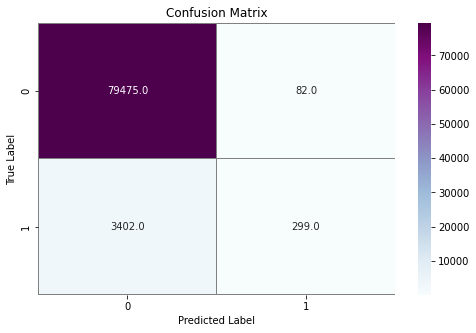

In [ ]:
Y_pred = model_1.predict(X_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(Y_test,axis = 1) 

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
f,ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="BuPu",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

##ResNet50

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3)

from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(Y_train, num_classes = 2)
Y_test = to_categorical(Y_test, num_classes = 2)

print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)

Training Data Shape: (194266, 50, 50, 3)
Testing Data Shape: (83258, 50, 50, 3)


In [ ]:
import tensorflow as tf
base_model = tf.keras.applications.ResNet50(
                include_top=False,
                weights="imagenet",
                input_tensor=None,
                pooling=None,
                input_shape= (50,50,3)
            )
for layer in base_model.layers:
    layer.trainable = False

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
def resnet():

    model = Sequential()
    model.add(base_model)
    
    model.add(Flatten())
    model.add(BatchNormalization())
    model.add(Dense(256,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2,activation='softmax'))
    
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])
    
    return model

In [ ]:
model_1 = resnet()
model_1.summary()
#model_1.fit(X_train,Y_train, epochs=10)
history = model_1.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = 10, batch_size = 100)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2, 2, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 batch_normalization (BatchN  (None, 8192)             32768     
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                        

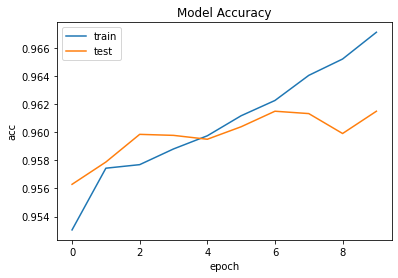

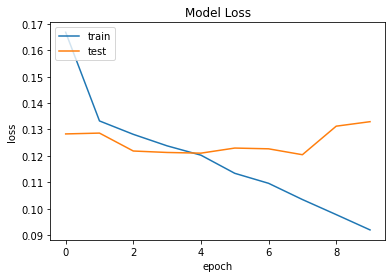

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

2602/2602 [==============================] - 1106s 424ms/step


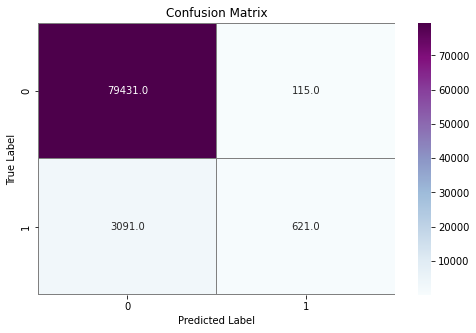

In [ ]:
Y_pred = model_1.predict(X_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(Y_test,axis = 1) 

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
f,ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="BuPu",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

##Inception V3

###inception 2 epochs

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=23)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(94543, 75, 75, 3) (63029, 75, 75, 3) (94543, 2) (63029, 2)


In [ ]:
from tensorflow.keras.applications import InceptionV3
Inception_V3 = tf.keras.applications.InceptionV3(input_shape=(75,75,3),include_top=False,weights="imagenet")
for layer in Inception_V3.layers[:-5]:
    layer.trainable=False

In [ ]:
#Building Model
model_inceptionv3=Sequential()
model_inceptionv3.add(Inception_V3)
model_inceptionv3.add(Dropout(0.7))
model_inceptionv3.add(Flatten())
model_inceptionv3.add(Dense(2,activation='softmax'))

In [ ]:
model_inceptionv3.compile(optimizer='Nadam', loss='binary_crossentropy',metrics=[tf.keras.metrics.BinaryAccuracy(name='Accuracy:'),
                                                                    tf.keras.metrics.Precision(name='Precision:'),
                                                                    tf.keras.metrics.Recall(name='Recall:')])

In [ ]:
model_InceptionV3 = model_inceptionv3.fit(X_train, y_train,validation_data=(X_test, y_test),verbose = 1,epochs = 2,batch_size=36)

Epoch 1/2
2627/2627 [==============================] - 1299s 492ms/step - loss: 5.1127 - Accuracy:: 0.7888 - Precision:: 0.7888 - Recall:: 0.7888 - val_loss: 3.3267 - val_Accuracy:: 0.6188 - val_Precision:: 0.6188 - val_Recall:: 0.6188
Epoch 2/2
2627/2627 [==============================] - 1299s 495ms/step - loss: 3.2260 - Accuracy:: 0.7854 - Precision:: 0.7854 - Recall:: 0.7854 - val_loss: 2.8921 - val_Accuracy:: 0.8481 - val_Precision:: 0.8481 - val_Recall:: 0.8481


In [ ]:
model_inceptionv3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 1, 1, 2048)        21802784  
                                                                 
 dropout (Dropout)           (None, 1, 1, 2048)        0         
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 2)                 4098      
                                                                 
Total params: 21,806,882
Trainable params: 4,098
Non-trainable params: 21,802,784
_________________________________________________________________


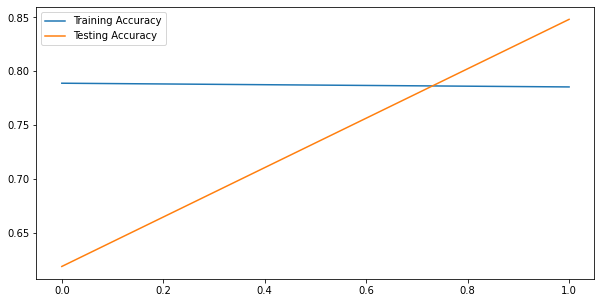

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(model_InceptionV3.history['Accuracy:'], label="Training Accuracy")
plt.plot(model_InceptionV3.history['val_Accuracy:'], label = "Testing Accuracy")
plt.legend()

1970/1970 [==============================] - 535s 272ms/step


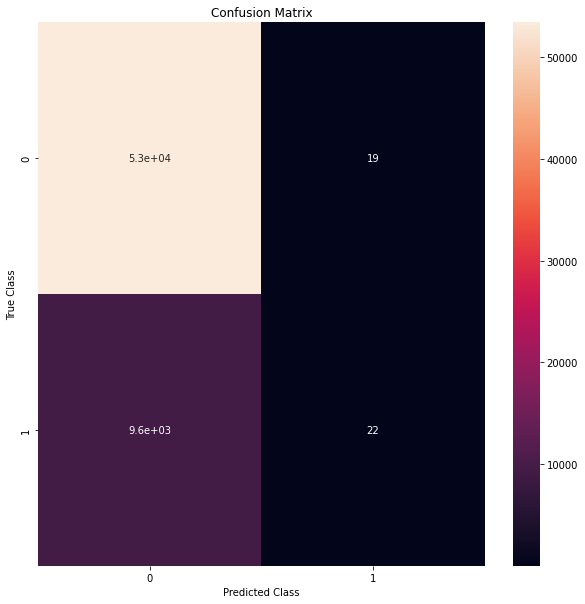

In [ ]:
from sklearn.metrics import confusion_matrix


y_hat = model_inceptionv3.predict(X_test)
y_hat_class = np.argmax(y_hat,axis = 1) 
y_observed = np.argmax(y_test,axis = 1) 

confusion_mtx = confusion_matrix(y_observed, y_hat_class) 

f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(confusion_mtx, annot=True,ax=ax)
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
print(classification_report(y_observed, y_hat_class))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92     53453
           1       0.54      0.00      0.00      9576

    accuracy                           0.85     63029
   macro avg       0.69      0.50      0.46     63029
weighted avg       0.80      0.85      0.78     63029



###inception 6 epochs

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=1)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(94543, 75, 75, 3) (63029, 75, 75, 3) (94543, 2) (63029, 2)


In [ ]:
from tensorflow.keras.applications import InceptionV3
Inception_V3 = tf.keras.applications.InceptionV3(input_shape=(75,75,3),include_top=False,weights="imagenet")
for layer in Inception_V3.layers[:-5]:
    layer.trainable=False

87910968/87910968 [==============================] - 1s 0us/step


In [ ]:
#Building Model
model_inceptionv3=Sequential()
model_inceptionv3.add(Inception_V3)
model_inceptionv3.add(Dropout(0.7))
model_inceptionv3.add(Flatten())
model_inceptionv3.add(Dense(2,activation='softmax'))

In [ ]:
model_inceptionv3.compile(optimizer='Nadam', loss='binary_crossentropy',metrics=[tf.keras.metrics.BinaryAccuracy(name='Accuracy:'),
                                                                    tf.keras.metrics.Precision(name='Precision:'),
                                                                    tf.keras.metrics.Recall(name='Recall:')])

In [ ]:
model_inceptionv3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 1, 1, 2048)        21802784  
                                                                 
 dropout (Dropout)           (None, 1, 1, 2048)        0         
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 2)                 4098      
                                                                 
Total params: 21,806,882
Trainable params: 4,098
Non-trainable params: 21,802,784
_________________________________________________________________


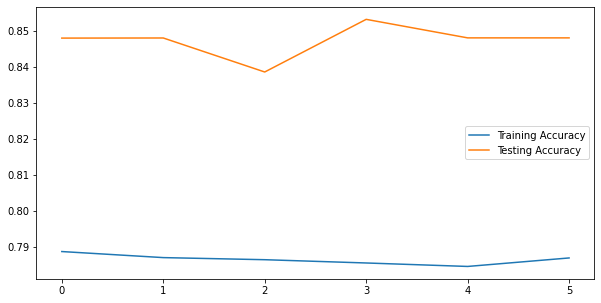

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(model_InceptionV3.history['Accuracy:'], label="Training Accuracy")
plt.plot(model_InceptionV3.history['val_Accuracy:'], label = "Testing Accuracy")
plt.legend()

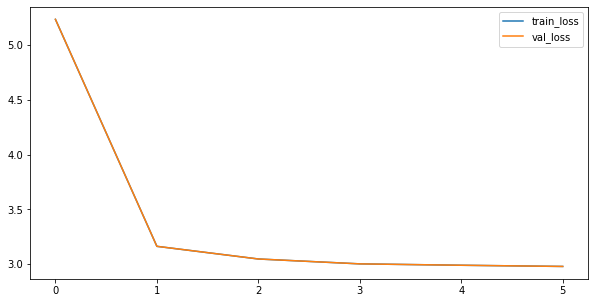

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(model_InceptionV3.history['loss'], label = "train_loss")
plt.plot(model_InceptionV3.history['loss'], label = "val_loss")
plt.legend()

1970/1970 [==============================] - 530s 268ms/step


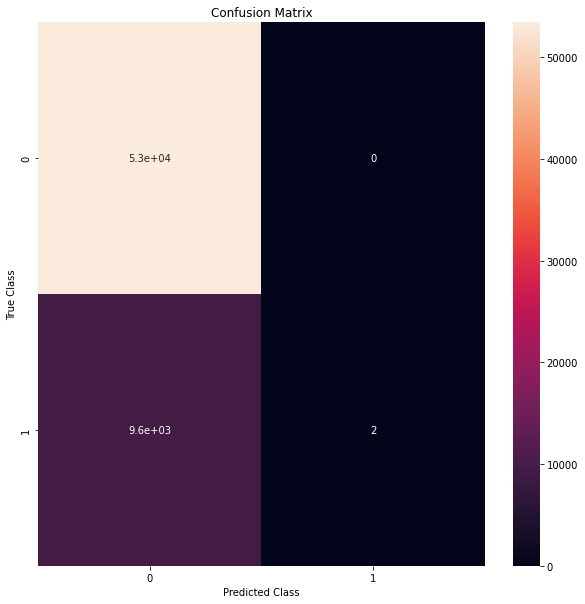

In [ ]:
from sklearn.metrics import confusion_matrix


y_hat = model_inceptionv3.predict(X_test)
y_hat_class = np.argmax(y_hat,axis = 1) 
y_observed = np.argmax(y_test,axis = 1) 

confusion_mtx = confusion_matrix(y_observed, y_hat_class) 

f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(confusion_mtx, annot=True,ax=ax)
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
print(classification_report(y_observed, y_hat_class))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92     53446
           1       1.00      0.00      0.00      9583

    accuracy                           0.85     63029
   macro avg       0.92      0.50      0.46     63029
weighted avg       0.87      0.85      0.78     63029

